In [4]:
import openmc
import numpy as np
from barc_model_simple_toroidal import dt_plasma, flibe, v4cr4ti, inconel718
from matplotlib import rc
import matplotlib.pyplot as plt
rc('font', **{'family': 'serif', 'serif': ['Computer Modern'], 'size': 18})
rc('text', usetex=True)

In [5]:
# Define basic toroidal geometry
bigsphere = openmc.Sphere(r=1000, boundary_type="vacuum")
plasma = openmc.ZTorus(x0=0,y0=0,z0=0,a=680,b=120,c=120)
vv = openmc.ZTorus(x0=0,y0=0,z0=0,a=680,b=125,c=125)
blanket_tank = openmc.ZTorus(x0=0,y0=0,z0=0,a=680,b=127,c=127)
tank_divider_in = openmc.ZTorus(x0=0,y0=0,z0=0,a=680,b=150,c=150)
tank_divider_out = openmc.ZTorus(x0=0,y0=0,z0=0,a=680,b=154,c=152)
burner_tank = openmc.ZTorus(x0=0,y0=0,z0=0,a=680,b=250,c=250)

In [6]:
plasma_cell = openmc.Cell()
plasma_cell.region = -plasma
plasma_cell.fill = dt_plasma

sol_cell = openmc.Cell()
sol_cell.region = +plasma & -vv

vv_cell = openmc.Cell()
vv_cell.region = +vv & -blanket_tank
vv_cell.fill = inconel718

blanket1_cell = openmc.Cell()
blanket1_cell.region = +blanket_tank & -tank_divider_in
blanket1_cell.fill = flibe

tank_divider_cell = openmc.Cell()
tank_divider_cell.region = +tank_divider_in & -tank_divider_out
tank_divider_cell.fill = inconel718

blanket2_cell = openmc.Cell()
blanket2_cell.region = +tank_divider_out & -burner_tank
blanket2_cell.fill = flibe

container_cell = openmc.Cell()
container_cell.region = +burner_tank & -bigsphere

universe = openmc.Universe()
universe.add_cell(plasma_cell)
universe.add_cell(sol_cell)
universe.add_cell(vv_cell)
universe.add_cell(blanket1_cell)
universe.add_cell(tank_divider_cell)
universe.add_cell(blanket2_cell)
universe.add_cell(container_cell)


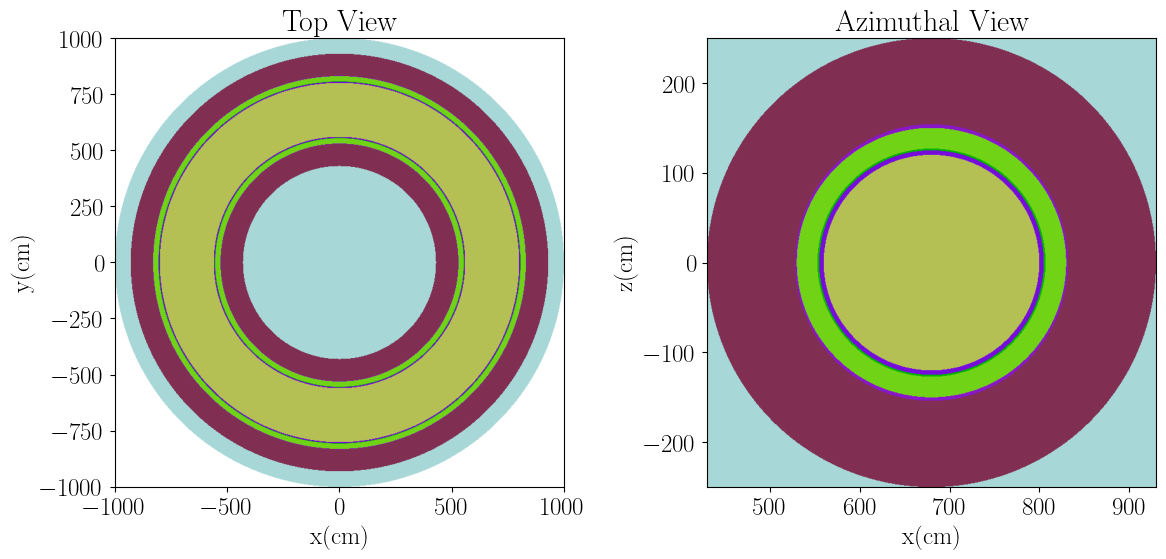

In [7]:

fig, ax = plt.subplots(1,2, figsize=[12,6])

universe.plot(width=(2000.0, 2000.0),
               origin=(0.0, 0.0, 0.1),
               pixels=500000,
               color_by='cell',
               axes=ax[0]
               )

universe.plot(width=(500.0, 500.0), 
              origin=(680.0, 0.0, 0.1), 
              basis='xz',
              pixels=500000,
              color_by='cell',
              axes=ax[1]
               )

ax[0].set_title('Top View')
ax[0].set_xlabel('x(cm)')
ax[0].set_ylabel('y(cm)')
ax[1].set_title('Azimuthal View')
ax[1].set_xlabel('x(cm)')
ax[1].set_ylabel('z(cm)')
fig.tight_layout()

plt.savefig('geometry.png')
